In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
train = pd.read_csv('~/data/train.csv')
test = pd.read_csv('~/data/test.csv')
val = pd.read_csv('~/data/dev.csv')

In [4]:
val.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0


In [25]:
train['sent_1_len'] = train['sentence_1'].apply(lambda x : len(x))
train['sent_2_len'] = train['sentence_2'].apply(lambda x : len(x))

In [26]:
train.describe()

,label,binary-label,sent_1_len,sent_2_len
count,9324.000000,9324.000000,9324.000000,9324.000000
mean,1.849968,0.389532,23.258151,23.726405
std,1.602212,0.487670,14.395189,13.385380
min,0.000000,0.000000,9.000000,5.000000
25%,0.200000,0.000000,14.000000,15.000000
50%,1.600000,0.000000,19.000000,20.000000
75%,3.400000,1.000000,28.000000,28.000000
max,5.000000,1.000000,98.000000,114.000000


In [33]:
train[train['sent_2_len']==5]

,id,source,sentence_1,sentence_2,label,binary-label,sent_1_len,sent_2_len
1613,boostcamp-sts-v1-train-1613,slack-rtt,destiny..?,운명..?,4.6,1.0,10,5
7012,boostcamp-sts-v1-train-7012,nsmc-rtt,나 또한 원주율을 위해..,나도...,0.2,0.0,14,5
9119,boostcamp-sts-v1-train-9119,slack-rtt,엇 느낌있네요 ㅋㅋ,어떤 느낌,1.0,0.0,10,5
9143,boostcamp-sts-v1-train-9143,slack-rtt,네 저거 맞습니다.,네 맞아요,3.4,1.0,10,5


In [34]:
train[train['sent_2_len']==114]

,id,source,sentence_1,sentence_2,label,binary-label,sent_1_len,sent_2_len
2412,boostcamp-sts-v1-train-2412,nsmc-rtt,‥ 김민희를알수록 의심되는 정체. 완벽한연기. 완벽한몰입과스릴. 작은반전. 무엇보다...,‥ 김민희를 알면 알수록 의심스러워진다. 완벽한 연기. 완벽한 몰입과 스릴. 작은 ...,4.0,1.0,94,114


In [47]:
fig = plt.figure(figsize=(9,9))
plt.show()

TypeError: 'module' object is not callable

<AxesSubplot:>

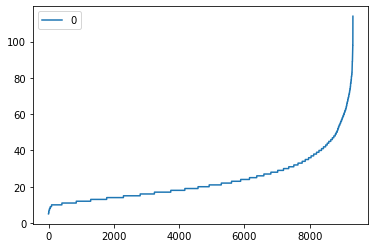

In [43]:
pd.DataFrame(sorted(train['sent_2_len'])).plot()

In [20]:
# ㅎㅎ, ㅋㅋ, ㅠㅠ, ^^ -> 일반화 필요할 듯

num1, num2, num3, num4, num5 = 0,0,0,0,0

for line in train['sentence_1']:
    if 'ㅎㅎ' in line:
        num1 += 1
    if 'ㅋㅋ' in line:
        num2 += 1
    if 'ㅠㅠ' in line or 'ㅜㅜ' in line:
        num3 += 1
    if '^^' in line:
        num4 += 1
    if ';;' in line:
        num5 += 1
print('<<train>>')
print('ㅎㅎ ->', num1,'/',len(train))
print('ㅋㅋ ->', num2,'/',len(train))
print('ㅠㅠ, ㅜㅜ ->', num3,'/',len(train))
print('^^ ->', num4,'/',len(train))
print(';; ->', num5,'/',len(train))

num1, num2, num3, num4, num5 = 0,0,0,0,0

for line in val['sentence_1']:
    if 'ㅎㅎ' in line:
        num1 += 1
    if 'ㅋㅋ' in line:
        num2 += 1
    if 'ㅠㅠ' in line or 'ㅜㅜ' in line:
        num3 += 1
    if '^^' in line:
        num4 += 1
    if ';;' in line:
        num5 += 1
print('<<val>>')
print('ㅎㅎ ->', num1,'/',len(val))
print('ㅋㅋ ->', num2,'/',len(val))
print('ㅠㅠ, ㅜㅜ ->', num3,'/',len(val))
print('^^ ->', num4,'/',len(val))
print(';; ->', num5,'/',len(train))

num1, num2, num3, num4, num5 = 0,0,0,0,0

for line in test['sentence_1']:
    if 'ㅎㅎ' in line:
        num1 += 1
    if 'ㅋㅋ' in line:
        num2 += 1
    if 'ㅠㅠ' in line or 'ㅜㅜ' in line:
        num3 += 1
    if '^^' in line:
        num4 += 1
    if ';;' in line:
        num5 += 1
print('<<test>>')
print('ㅎㅎ ->', num1,'/',len(test))
print('ㅋㅋ ->', num2,'/',len(test))
print('ㅠㅠ, ㅜㅜ ->', num3,'/',len(test))
print('^^ ->', num4,'/',len(test))
print(';; ->', num5,'/',len(train))

<<train>>
ㅎㅎ -> 318 / 9324
ㅋㅋ -> 473 / 9324
ㅠㅠ, ㅜㅜ -> 130 / 9324
^^ -> 64 / 9324
;; -> 40 / 9324
<<val>>
ㅎㅎ -> 12 / 550
ㅋㅋ -> 32 / 550
ㅠㅠ, ㅜㅜ -> 5 / 550
^^ -> 4 / 550
;; -> 0 / 9324
<<test>>
ㅎㅎ -> 34 / 1100
ㅋㅋ -> 48 / 1100
ㅠㅠ, ㅜㅜ -> 15 / 1100
^^ -> 7 / 1100
;; -> 3 / 9324


In [18]:
train.head()

,id,source,sentence_1,sentence_2,label,binary-label,sent_1_len,sent_2_len
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,38,20
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,20,19
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,14,18
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,22,28
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,10,21


In [48]:
def check(x):
    if 'ㅎㅎ' in x or 'ㅋㅋ' in x or 'ㅜㅜ' in x or 'ㅠㅠ' in x or ';;' in x:
        return True
    return False


In [58]:
print(np.average(train[train['sentence_1'].apply(check)]['label']))
print(np.average(train[train['sentence_1'].apply(check)]['binary-label']))
print()
print(np.average(train[~train['sentence_1'].apply(check)]['label']))
print(np.average(train[~train['sentence_1'].apply(check)]['binary-label']))

1.6085197018104367
0.34717784877529284
1.8770065593321408
0.3942754919499106


In [61]:
print(np.average(train[train['sentence_2'].apply(check)]['label']))
print(np.average(train[train['sentence_2'].apply(check)]['binary-label']))
print()
print(np.average(train[~train['sentence_2'].apply(check)]['label']))
print(np.average(train[~train['sentence_2'].apply(check)]['binary-label']))

1.2765986394557822
0.254421768707483

1.8990336476889045
0.4010944230993131


In [2]:
data = pd.read_csv('../train.csv')

In [10]:
list((data['sentence_1'] + '[SEP]' + data['sentence_2']).values)[:16]

['스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~[SEP]반전도 있고,사랑도 있고재미도있네요.',
 '앗 제가 접근권한이 없다고 뜹니다;;[SEP]오, 액세스 권한이 없다고 합니다.',
 '주택청약조건 변경해주세요.[SEP]주택청약 무주택기준 변경해주세요.',
 '입사후 처음 대면으로 만나 반가웠습니다.[SEP]화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.',
 '뿌듯뿌듯 하네요!![SEP]꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!',
 '오마이가뜨지져스크롸이스트휏[SEP]오 마이 갓 지저스 스크론 이스트 팬',
 '전 암만 찍어도 까만 하늘.. ㅠㅠ[SEP]암만 찍어도 하늘은 까맣다.. ㅠㅠ',
 '이렇게 귀여운 쥐들은 처음이네요.ㅎㅎㅎ[SEP]이렇게 지겨운 공포영화는 처음..',
 '미세먼지 해결이 가장 시급한 문제입니다![SEP]가장 시급한 것이 신생아실 관리입니다!!!',
 '크림하우스 환불조치해주세요.[SEP]크림하우스 환불조치할 수 있도록해주세여',
 '그 책부터 언능 꺼내봐야 겠어요![SEP]책에서 꺼내야겠어요!',
 '극의전개가너무느릿하여답답합니다[SEP]전개가 너무 느려서 속터진다',
 '오랫만에 존쿠삭의 연기보니 좋네요 Good~~!![SEP]오랜만에 존 쿠삭의 연기를 보니 반갑다. 좋아요~~!!',
 '글쎄.. 특색도 없고 별로였던 걸로 기억하는데..[SEP]큰 반전 없던걸로 기억하는데...',
 '아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.[SEP]여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.',
 'LG전자 스마트폰 생산 중단 청원[SEP]LG전자서비스의 노조 와해를 조사해주세요.']